In [7]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

In [8]:
from tensorflow.keras.utils import to_categorical  # 분류분석시 원핫인코딩
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input
import numpy as np

# 머신러닝/딥러닝 : 데이터의 법칙성을 추출
- 다양한 분야에서 응용 : 글씨인식, 문장분류, 질병진단
 - ml/dl 의 종류
 - 지도학습(독립 = 입력변수와 종속 = 타겟 = 출력변수가 모두 주어졌을 경우)
     회귀분석(타겟변수가 연속형) vs 분류분석(multi, binary)
 - 비지도학습(입력변수만)
     군집화
 - 강화학습
 
 1. 데이터셋 확보(input = 입력변수, target=종속변수)
     원본 데이터 및 시뮬레이션을 통해 데이터 생성
 2. 전처리
     스케일 조정
     훈련셋(학습셋), 검증셋, 시험셋(테스트셋)
     학습 및 평가 가능한 포맷으로 변환(numpy, DataFrame)
 - 3. 모델구성
     sequential 객체 생성뒤 필요한 층을 add()함수로 추가
 - 4 모델 학습과정 설정
     compile()함수 이용. 손실함수, otimizer,  metrics(평가지표)
 - 5 모델학습시키기(ft. 학습과정 지켜보기)
     fit()함수 이용 - 훈련셋 입력=독립변수, 훈련셋타겟변수 = 종속변수, 학습횟수, 검증셋
  - 6 모델 평기
      시험셋을 인자로 넣은 evalueter()평가, 그래프
  - 7 모델 사용
      predict() 이용. 입력데이터는 2차원 데이터
  - 8 모델 저장
      save()함수 이용해서 저장. 저장된 모델은 load_model()함수를 이용해서 불러올 수 있음


# 2. 데이터 전처리

In [9]:
x_train = np.array([1,2,3,4,5,6,7,8,9]*10)
y_train = np.array([2,4,6,8,10,12,14,16,18]*10)
# 검증데이터
x_val = np.array([1,2,3,4,5,6,7,8,9])
y_val = np.array([2,4,6,8,10,12,14,16,18])
# 테스트셋= 시험데이터
x_test = np.array([1,2,3,4,5,6,7,8,9])
y_test = np.array([2,4,6,8,10,12,14,16,18])
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((90,), (9,), (9,), (90,), (9,), (9,))

In [10]:
data = np.array(['a','b','b','d'])
print('원 데이터:',data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labeled_data = le.fit_transform(data)
print(labeled_data)
one_hot_encoded_data = to_categorical(labeled_data)
print(one_hot_encoded_data)

원 데이터: ['a' 'b' 'b' 'd']
[0 1 1 2]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [11]:
# 분류분석을 위해, target을 원핫인코딩
data = np.array([1,2,2,4,5])
print(data)
categorical_one_hot = to_categorical(data)
print(categorical_one_hot)
import pandas as pd
get_dumies_one_hot = pd.get_dummies(data)
display('get_dumies를 이용한 원핫인 코딩:', get_dumies_one_hot)
print(type(categorical_one_hot))

[1 2 2 4 5]
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


'get_dumies를 이용한 원핫인 코딩:'

,1,2,4,5
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1


<class 'numpy.ndarray'>


In [12]:
# 분류분석을 위한 target변수 라벨링 전환
Y_train = to_categorical(y_train, 19)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)
Y_test

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]], dtype=float32)

In [13]:
x_train.shape, Y_train.shape   # 독립변수1개, 타겟변수 19

((90,), (90, 19))

In [14]:
print('훈련셋 구조:', x_train.shape, Y_train.shape)
print('검증셋 구조:', x_val.shape, Y_val.shape)
print('테스트셋 구조:', x_test.shape, Y_test.shape)

훈련셋 구조: (90,) (90, 19)
검증셋 구조: (9,) (9, 19)
테스트셋 구조: (9,) (9, 19)


## 3. 모델 구성하기

In [15]:
model = Sequential()
model.add(Input(shape=(1,))) # 입력층
model.add(Dense(units=38, activation='sigmoid' ))
model.add(Dense(units=64, activation='elu'))
model.add(Dense(units=32, activation='elu'))
model.add(Dense(units=19, activation='softmax'))   
# softmax 모든 출력 결과의 합이 1. 분류분석 마지막 layer(출력층에서) activation으로
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


# 모델 학습과정 설정

In [16]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy']) # 평가지표 : accuracy

## 5. 모델학습시키기

In [17]:
hist = model.fit(x_train, Y_train,
                epochs=300,
                batch_size=10,
                verbose=2, #학습결과 출력 옵션 0: 출력없음 1: 기본값, 2:에어포크별로그상세 출력
                validation_data=[x_val, Y_val])  

Epoch 1/300
9/9 - 1s - loss: 3.0716 - accuracy: 0.1111 - val_loss: 2.9587 - val_accuracy: 0.1111 - 692ms/epoch - 77ms/step
Epoch 2/300
9/9 - 0s - loss: 2.9082 - accuracy: 0.1111 - val_loss: 2.8213 - val_accuracy: 0.1111 - 41ms/epoch - 5ms/step
Epoch 3/300
9/9 - 0s - loss: 2.7817 - accuracy: 0.0222 - val_loss: 2.7154 - val_accuracy: 0.1111 - 43ms/epoch - 5ms/step
Epoch 4/300
9/9 - 0s - loss: 2.6844 - accuracy: 0.1000 - val_loss: 2.6295 - val_accuracy: 0.0000e+00 - 43ms/epoch - 5ms/step
Epoch 5/300
9/9 - 0s - loss: 2.6064 - accuracy: 0.0111 - val_loss: 2.5583 - val_accuracy: 0.1111 - 46ms/epoch - 5ms/step
Epoch 6/300
9/9 - 0s - loss: 2.5416 - accuracy: 0.0667 - val_loss: 2.4990 - val_accuracy: 0.1111 - 45ms/epoch - 5ms/step
Epoch 7/300
9/9 - 0s - loss: 2.4870 - accuracy: 0.0889 - val_loss: 2.4477 - val_accuracy: 0.0000e+00 - 44ms/epoch - 5ms/step
Epoch 8/300
9/9 - 0s - loss: 2.4373 - accuracy: 0.1222 - val_loss: 2.4030 - val_accuracy: 0.1111 - 41ms/epoch - 5ms/step
Epoch 9/300
9/9 - 0s -

Epoch 69/300
9/9 - 0s - loss: 1.4422 - accuracy: 0.5667 - val_loss: 1.4230 - val_accuracy: 0.6667 - 39ms/epoch - 4ms/step
Epoch 70/300
9/9 - 0s - loss: 1.4360 - accuracy: 0.5000 - val_loss: 1.4133 - val_accuracy: 0.5556 - 37ms/epoch - 4ms/step
Epoch 71/300
9/9 - 0s - loss: 1.4355 - accuracy: 0.5222 - val_loss: 1.4041 - val_accuracy: 0.6667 - 36ms/epoch - 4ms/step
Epoch 72/300
9/9 - 0s - loss: 1.4229 - accuracy: 0.5556 - val_loss: 1.3947 - val_accuracy: 0.7778 - 39ms/epoch - 4ms/step
Epoch 73/300
9/9 - 0s - loss: 1.4191 - accuracy: 0.4889 - val_loss: 1.3854 - val_accuracy: 0.7778 - 37ms/epoch - 4ms/step
Epoch 74/300
9/9 - 0s - loss: 1.4128 - accuracy: 0.6000 - val_loss: 1.3767 - val_accuracy: 0.5556 - 39ms/epoch - 4ms/step
Epoch 75/300
9/9 - 0s - loss: 1.3953 - accuracy: 0.6333 - val_loss: 1.3673 - val_accuracy: 0.5556 - 36ms/epoch - 4ms/step
Epoch 76/300
9/9 - 0s - loss: 1.3809 - accuracy: 0.5444 - val_loss: 1.3586 - val_accuracy: 0.6667 - 38ms/epoch - 4ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.9873 - accuracy: 0.8333 - val_loss: 0.9600 - val_accuracy: 0.8889 - 38ms/epoch - 4ms/step
Epoch 137/300
9/9 - 0s - loss: 0.9866 - accuracy: 0.8333 - val_loss: 0.9531 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 138/300
9/9 - 0s - loss: 0.9794 - accuracy: 0.8556 - val_loss: 0.9487 - val_accuracy: 0.8889 - 37ms/epoch - 4ms/step
Epoch 139/300
9/9 - 0s - loss: 0.9705 - accuracy: 0.8778 - val_loss: 0.9432 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 140/300
9/9 - 0s - loss: 0.9691 - accuracy: 0.8000 - val_loss: 0.9390 - val_accuracy: 0.8889 - 38ms/epoch - 4ms/step
Epoch 141/300
9/9 - 0s - loss: 0.9770 - accuracy: 0.7778 - val_loss: 0.9330 - val_accuracy: 0.8889 - 37ms/epoch - 4ms/step
Epoch 142/300
9/9 - 0s - loss: 0.9594 - accuracy: 0.8778 - val_loss: 0.9281 - val_accuracy: 0.8889 - 36ms/epoch - 4ms/step
Epoch 143/300
9/9 - 0s - loss: 0.9520 - accuracy: 0.8556 - val_loss: 0.9250 - val_accuracy: 0.8889 - 38ms/epoch - 4ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.7094 - accuracy: 0.9556 - val_loss: 0.6796 - val_accuracy: 0.8889 - 48ms/epoch - 5ms/step
Epoch 204/300
9/9 - 0s - loss: 0.7100 - accuracy: 0.9444 - val_loss: 0.6688 - val_accuracy: 0.8889 - 49ms/epoch - 5ms/step
Epoch 205/300
9/9 - 0s - loss: 0.7028 - accuracy: 0.8667 - val_loss: 0.6861 - val_accuracy: 0.8889 - 47ms/epoch - 5ms/step
Epoch 206/300
9/9 - 0s - loss: 0.6944 - accuracy: 0.9556 - val_loss: 0.6663 - val_accuracy: 0.8889 - 42ms/epoch - 5ms/step
Epoch 207/300
9/9 - 0s - loss: 0.6863 - accuracy: 0.9556 - val_loss: 0.6638 - val_accuracy: 0.8889 - 44ms/epoch - 5ms/step
Epoch 208/300
9/9 - 0s - loss: 0.6902 - accuracy: 0.9333 - val_loss: 0.6628 - val_accuracy: 0.8889 - 43ms/epoch - 5ms/step
Epoch 209/300
9/9 - 0s - loss: 0.6767 - accuracy: 0.8889 - val_loss: 0.6578 - val_accuracy: 1.0000 - 45ms/epoch - 5ms/step
Epoch 210/300
9/9 - 0s - loss: 0.6977 - accuracy: 0.9111 - val_loss: 0.6488 - val_accuracy: 1.0000 - 44ms/epoch - 5ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.5072 - accuracy: 0.9889 - val_loss: 0.4803 - val_accuracy: 1.0000 - 56ms/epoch - 6ms/step
Epoch 271/300
9/9 - 0s - loss: 0.5046 - accuracy: 0.9333 - val_loss: 0.4815 - val_accuracy: 1.0000 - 43ms/epoch - 5ms/step
Epoch 272/300
9/9 - 0s - loss: 0.5144 - accuracy: 0.9444 - val_loss: 0.4754 - val_accuracy: 1.0000 - 45ms/epoch - 5ms/step
Epoch 273/300
9/9 - 0s - loss: 0.5132 - accuracy: 0.9444 - val_loss: 0.4886 - val_accuracy: 0.8889 - 47ms/epoch - 5ms/step
Epoch 274/300
9/9 - 0s - loss: 0.5000 - accuracy: 0.9667 - val_loss: 0.4823 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 275/300
9/9 - 0s - loss: 0.4852 - accuracy: 0.9889 - val_loss: 0.4682 - val_accuracy: 1.0000 - 40ms/epoch - 4ms/step
Epoch 276/300
9/9 - 0s - loss: 0.4784 - accuracy: 0.9778 - val_loss: 0.4842 - val_accuracy: 1.0000 - 36ms/epoch - 4ms/step
Epoch 277/300
9/9 - 0s - loss: 0.4953 - accuracy: 0.9556 - val_loss: 0.4712 - val_accuracy: 0.8889 - 37ms/epoch - 4ms/step
Epoch 278/300
9/

# 6.모델 평가하기(모델학습과정 살펴보고 평가)

In [18]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

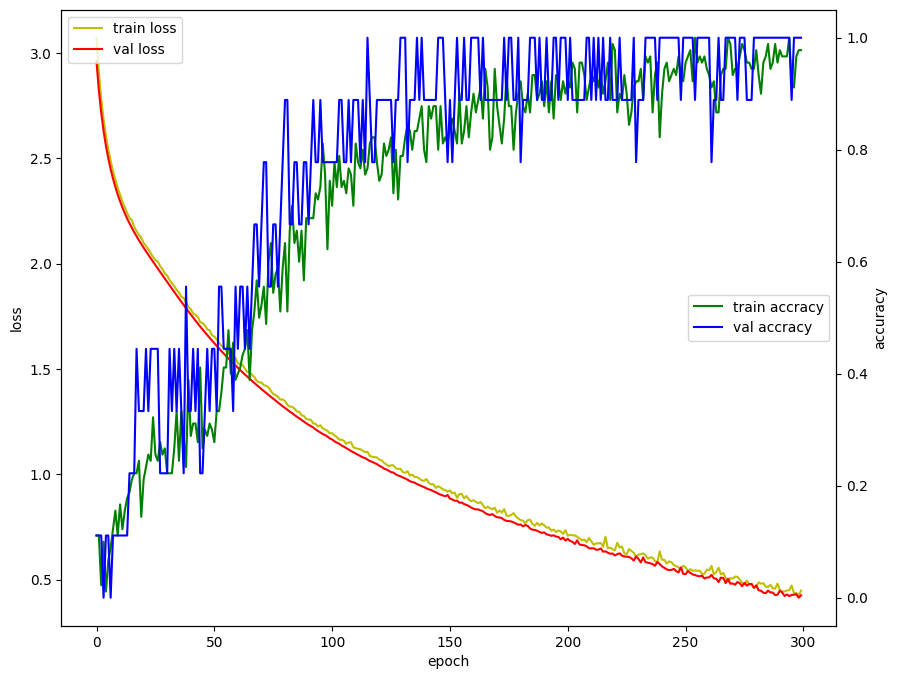

In [19]:
# 모델 학습과정 시각화
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,8))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax=loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [20]:
# 모델 평가
score = model.evaluate(x_test, Y_test, batch_size=1)

9/9 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 1.0000


In [21]:
score

[0.4256407618522644, 1.0]

In [22]:
print('평가된 loss:',score[0])
print('평가된 accuracy:',score[1]*100)

평가된 loss: 0.4256407618522644
평가된 accuracy: 100.0


## 7. 모델 사용하기


In [23]:
H = model.predict(np.array([[2]]))
H

1/1 [==============================] - 0s 105ms/step


array([[1.5939945e-15, 4.4239002e-15, 6.1051570e-02, 5.9698888e-13,
        8.7527138e-01, 6.9221743e-15, 6.3009016e-02, 5.7839301e-17,
        6.6727272e-04, 9.0525548e-17, 7.0644683e-07, 2.7100812e-14,
        2.2848605e-11, 1.3091837e-13, 1.5613513e-16, 8.6048616e-16,
        2.2713374e-23, 3.4846553e-14, 2.7999361e-32]], dtype=float32)

In [24]:
# 분류분석의 예측은 predict() 후 argmax()
model.predict(np.array([[2]])).argmax()

1/1 [==============================] - 0s 20ms/step


4

In [25]:
#4를 몇% 확률로 예측했는지
H[0, H.argmax()]*100

87.52713799476624

# 7. 모델 저장하기


In [26]:
#model
from tensorflow.keras.models import save_model
save_model(model, 'model/02_deep.h5')

## 저장된 모델 사용하기

In [27]:
from tensorflow.keras.models import load_model
model2=load_model('model/02_deep.h5')

In [28]:
model2.predict(np.array([[4]])).argmax()

1/1 [==============================] - 0s 70ms/step


8

In [29]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


In [35]:
data = np.array([[2],[3]])     # 예측 할려면 2차원 구조, numpy 배열로 들어가야 한다
predictions = model.predict(data)
predictions.argmax(axis=1)

1/1 [==============================] - 0s 27ms/step


array([4, 6], dtype=int64)

In [39]:
def predict_classes(model, data):
    predictions = model.predict(data)
    return predictions.argmax(axis=-1)

In [40]:
input_data = int(input('뭘 예측할까'))
data = np.array([[input_data]])
print('예측된 분류는',predict_classes(model2, data))

뭘 예측할까4
1/1 [==============================] - 0s 18ms/step
예측된 분류는 [8]
